In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pandas as pd

In [2]:
def load_file(log_file_path):

    # Read the log file
    with open(log_file_path, 'r') as file:
        log_data = file.read()

    return log_data


In [3]:
def parse_log(log_text):
    pattern = re.compile(r'\[(?P<pe_name>[^\]]+)\]\s+in\s+(?P<time>\d+\.\d+)\s+seconds\.')
    
    pe_times = defaultdict(list)
    
    for line in log_text.split('\n'):
        match = pattern.search(line)
        if match:
            pe_name = match.group('pe_name').strip()
            time_sec = float(match.group('time'))
            pe_times[pe_name].append(time_sec)
    
    return pe_times



In [4]:
def plot_distributions(pe_times):

    num_pes = len(pe_times)
    if num_pes == 0:
        print("No processing times found to plot.")
        return

    cols = 2
    rows = (num_pes + 1) // cols

    plt.figure(figsize=(cols * 6, rows * 4))
    plt.suptitle('Processing Time Distributions per Processing', fontsize=16)

    for idx, (pe, times) in enumerate(pe_times.items(), 1):
        plt.subplot(rows, cols, idx)
        plt.hist(times, bins=20, color='skyblue', edgecolor='black')

        plt.title(f'PE_{idx-1}')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency')
        plt.grid(True, linestyle='--', alpha=0.5)
        

        plt.xticks(rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
    plt.show()



In [5]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_distributions(pe_times):

    num_pes = len(pe_times)
    if num_pes == 0:
        print("No processing times found to plot.")
        return

    cols = 4

    rows = (num_pes + cols - 1) // cols

    plt.figure(figsize=(cols * 5, rows * 4))


    for idx, (pe, times) in enumerate(pe_times.items(), 1):
        plt.subplot(rows, cols, idx)
        plt.hist(times, bins=20, color='skyblue', edgecolor='black')

        plt.title(f'PE_{idx-1}')
        plt.xlabel('Time (s)', fontsize=20)
        plt.ylabel('Frequency',fontsize=20)
        plt.grid(True, linestyle='--', alpha=0.5)

        plt.xticks(rotation=45)

    total_subplots = rows * cols
    if num_pes < total_subplots:
        for empty_idx in range(num_pes + 1, total_subplots + 1):
            plt.subplot(rows, cols, empty_idx).axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

    return plt


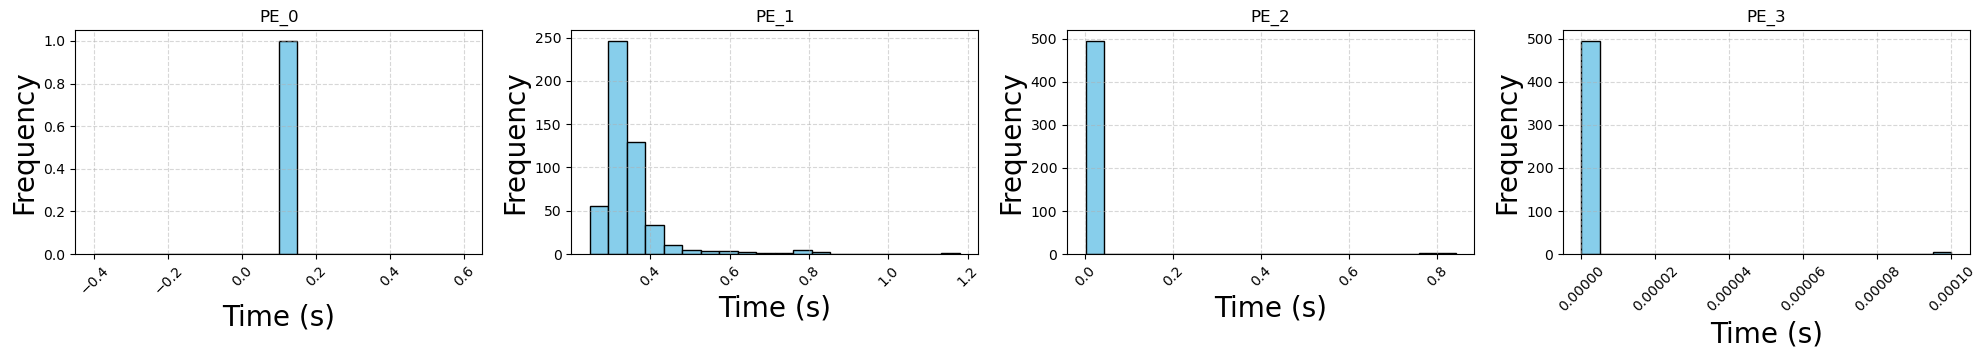

In [6]:

log_file_path = 'distribution_16_uniform.log'

log_data = load_file(log_file_path)

pe_times = parse_log(log_data)


plot_distributions(pe_times).savefig("./c3_motivation_uniform.pdf", dpi=300, bbox_inches='tight')

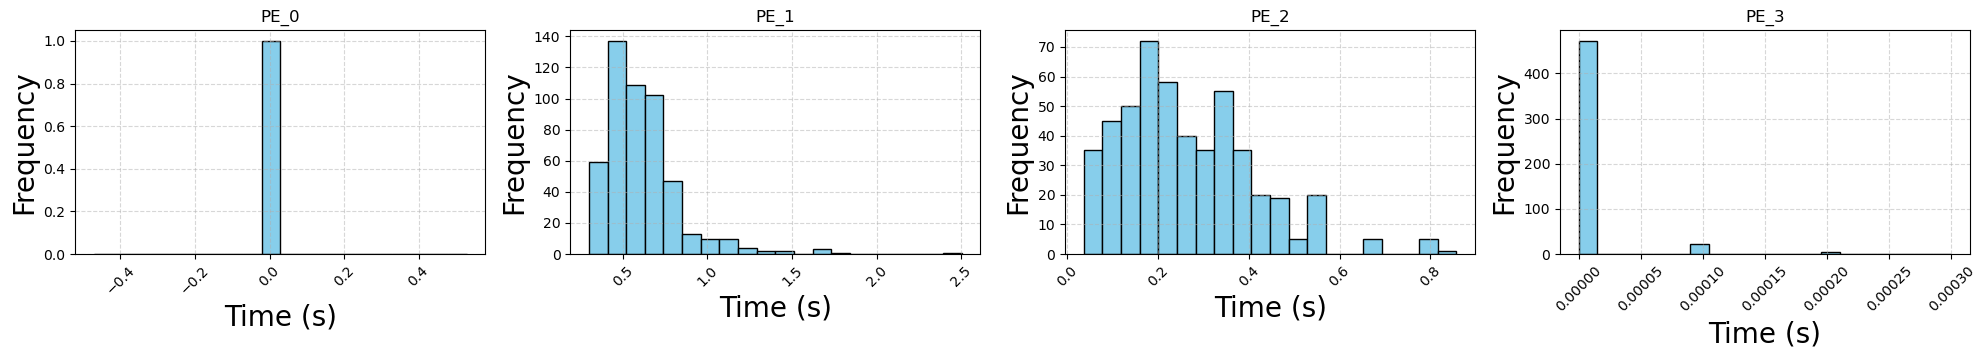

In [7]:

log_file_path = 'distribution_16_skew.log'
log_data = load_file(log_file_path)
pe_times = parse_log(log_data)

plot_distributions(pe_times).savefig("./c3_motivation_skew.pdf", dpi=300, bbox_inches='tight')